In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:

df = pd.read_csv('/Users/alvaroquintero/Project/Capstone-Project-Report/healthcare-dataset-stroke-data.csv')



FileNotFoundError: [Errno 2] No such file or directory: '/Users/alvaroquintero/Project/Capstone-Project-Report/healthcare-dataset-stroke-data.csv'

# **Data Info:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Check Null values & Duplicated:**

In [ ]:
df.isnull().sum().sort_values(ascending=False).head() # will be handled later using knnimputer after encoding

bmi             201
id                0
gender            0
age               0
hypertension      0
dtype: int64

<Axes: >

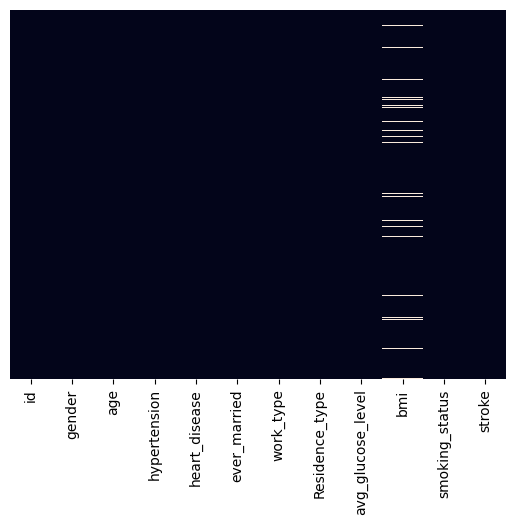

In [ ]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [ ]:
df.duplicated().sum() #no duplicated values

0

# **Correlations**

id :  0.006388170005145282
age :  0.24525734617097478
hypertension :  0.12790382346648044
heart_disease :  0.13491399696869255
avg_glucose_level :  0.13194544082571025
bmi :  0.04237366114923355


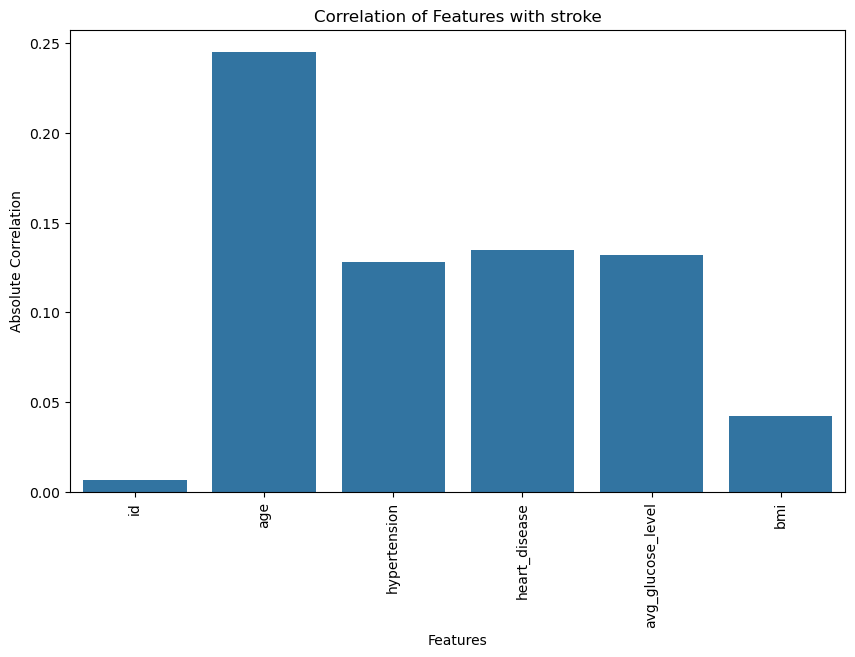

In [ ]:
# Select columns of type int or float
obj_cols = df.select_dtypes(include=['int64', 'float64']).columns

key = []
vals = []

# Iterate over numeric columns and compute correlation with 'RiskScore'
for n in obj_cols:
    if n=='stroke':
        continue
    key.append(n)
    vals.append(abs(df['stroke'].corr(df[n])))
    print(n,": ",df['stroke'].corr(df[n]))

# Plot the values
plt.figure(figsize=(10,6))
sns.barplot(x=key, y=vals)
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.title('Correlation of Features with stroke')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.show()

In [ ]:
df.nunique().sort_values()

hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
gender                  3
smoking_status          4
work_type               5
age                   104
bmi                   418
avg_glucose_level    3979
id                   5110
dtype: int64

# **Plots before balancing:**

The plot would not reflect a good view as the data is unbalanced

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='heart_disease', ylabel='count'>

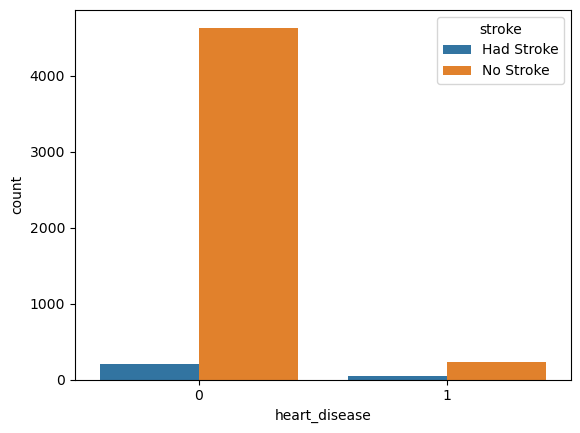

In [ ]:
df['stroke']=np.where(df['stroke'] == 1,'Had Stroke','No Stroke')
sns.countplot(x=df['heart_disease'],hue=df['stroke'])

<Axes: xlabel='hypertension', ylabel='count'>

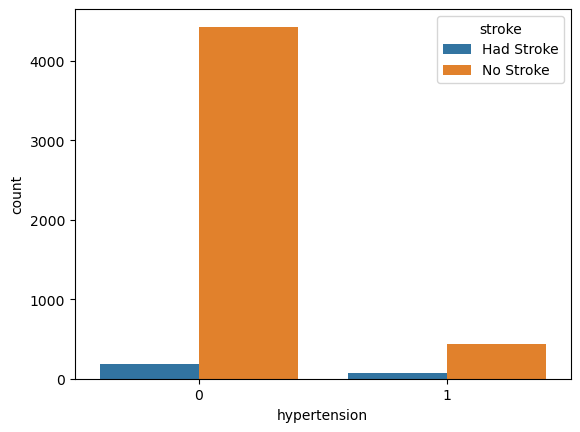

In [ ]:
sns.countplot(x=df['hypertension'],hue=df['stroke'])

In [ ]:
df['stroke']=np.where(df['stroke'] == 'Had Stroke',1,0) # return it back to numeric values


# **Encoding:**

In [ ]:
from sklearn.preprocessing import LabelEncoder
obj_cols=df.select_dtypes('object').columns
obj_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
for c in obj_cols:
    lb =LabelEncoder()
    df.loc[:,c]= lb.fit_transform(df[c])
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1


# **Handling Nan values:**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['bmi']=imputer.fit_transform(df[['bmi']])
df.isnull().sum().sort_values(ascending=False).head() 

id               0
gender           0
age              0
hypertension     0
heart_disease    0
dtype: int64

# **Data splitting and scaling:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [ ]:
X_train , X_test, y_train , y_test= train_test_split (X,y, shuffle= True,
                                                      random_state=42 , test_size=0.3)

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

# **Applying models:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score , f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
mod ={
'LogisticRegression' : LogisticRegression(random_state=42),
'DecisionTreeClassifier' : DecisionTreeClassifier(criterion= 'entropy',max_depth=None),
'RandomForestClassifier' : RandomForestClassifier(n_estimators=20, criterion ='gini',max_depth=None),
'svm': svm.LinearSVC(),
'KNN': KNeighborsClassifier(n_neighbors=5),
'Naive_bayes': GaussianNB()
}

NameError: name 'LogisticRegression' is not defined

In [ ]:
calcs= {
'Models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','svm',
'KNN','Naive_bayes'],
'score_train':[],
'score_test':[],
'accuracy_score':[],
'recall':[],
'precision':[],
'f1_score':[],
'cnf_matrix':[]
}

In [ ]:
y_pred=[]
k=0
for n in mod :
    mod[n].fit(X_train,y_train)
    y_pred.append(mod[n].predict(X_test))
    calcs['accuracy_score'].append( accuracy_score(y_test,y_pred[k]) )
    calcs['recall'].append( recall_score(y_test,y_pred[k],average='weighted'))
    calcs['precision'].append( precision_score(y_test,y_pred[k],average='weighted') )
    calcs['score_train'].append( mod[n].score(X_train,y_train) )
    calcs['score_test'].append( mod[n].score(X_test,y_test) )
    calcs['f1_score'].append(f1_score(y_test, y_test, average='weighted'))
    calcs['cnf_matrix'].append( metrics.confusion_matrix(y_test, y_pred[k]) )
    k=k+1
calcs

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Models': ['LogisticRegression',
  'DecisionTreeClassifier',
  'RandomForestClassifier',
  'svm',
  'KNN',
  'Naive_bayes'],
 'score_train': [0.9552697791445345,
  1.0,
  0.9966452334358401,
  0.9552697791445345,
  0.9583449818283478,
  0.8716801789208835],
 'score_test': [0.9419439008480104,
  0.9028049575994781,
  0.9399869536855838,
  0.9419439008480104,
  0.9412915851272016,
  0.8649706457925636],
 'accuracy_score': [0.9419439008480104,
  0.9028049575994781,
  0.9399869536855838,
  0.9419439008480104,
  0.9412915851272016,
  0.8649706457925636],
 'recall': [0.9419439008480104,
  0.9028049575994781,
  0.9399869536855838,
  0.9419439008480104,
  0.9412915851272016,
  0.8649706457925636],
 'precision': [0.8872583123447664,
  0.8990967492514751,
  0.8993070426190989,
  0.8872583123447664,
  0.9115347178819889,
  0.9157712363508552],
 'f1_score': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'cnf_matrix': [array([[1444,    0],
         [  89,    0]]),
  array([[1373,   71],
         [  78,   11]]),

In [ ]:
models = pd.DataFrame(calcs)
models.sort_values(by='score_test',ascending=False).style.background_gradient(cmap='YlGn')

,Models,score_train,score_test,accuracy_score,recall,precision,f1_score,cnf_matrix
0,LogisticRegression,0.955270,0.941944,0.941944,0.941944,0.887258,1.000000,[[1444 0] [ 89 0]]
3,svm,0.955270,0.941944,0.941944,0.941944,0.887258,1.000000,[[1444 0] [ 89 0]]
4,KNN,0.958345,0.941292,0.941292,0.941292,0.911535,1.000000,[[1441 3] [ 87 2]]
2,RandomForestClassifier,0.996645,0.939987,0.939987,0.939987,0.899307,1.000000,[[1440 4] [ 88 1]]
1,DecisionTreeClassifier,1.000000,0.902805,0.902805,0.902805,0.899097,1.000000,[[1373 71] [ 78 11]]
5,Naive_bayes,0.871680,0.864971,0.864971,0.864971,0.915771,1.000000,[[1290 154] [ 53 36]]


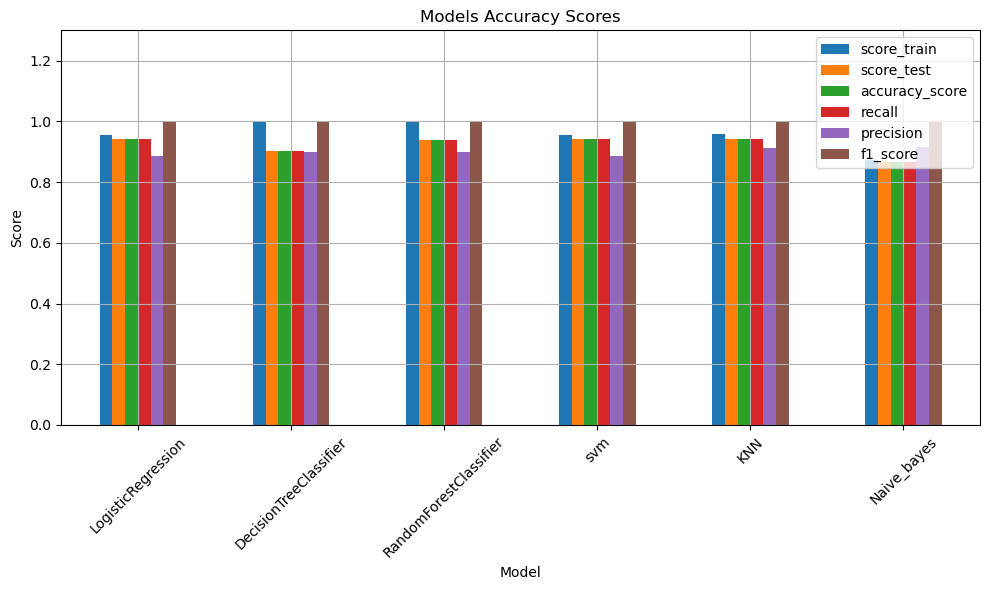

In [ ]:
models=models.rename(index={0: 'LogisticRegression', 1:'DecisionTreeClassifier', 2:'RandomForestClassifier',
                    3:'svm', 4:'KNN', 5:'Naive_bayes'})
# Plotting
models.plot(kind='bar', figsize=(10, 6))

# Customizing the plot

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Models Accuracy Scores')
plt.ylim(0,1.3)
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.grid(True)
# Display the plot
plt.show()

In [ ]:
target_names = ['Had stroke', 'NO stroke']
for n in range(0,6):
    print("For ",models.index[n],":\n\n",classification_report(y_test, y_pred[n], target_names=target_names))

For  LogisticRegression :

               precision    recall  f1-score   support

  Had stroke       0.94      1.00      0.97      1444
   NO stroke       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

For  DecisionTreeClassifier :

               precision    recall  f1-score   support

  Had stroke       0.95      0.95      0.95      1444
   NO stroke       0.13      0.12      0.13        89

    accuracy                           0.90      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.90      0.90      0.90      1533

For  RandomForestClassifier :

               precision    recall  f1-score   support

  Had stroke       0.94      1.00      0.97      1444
   NO stroke       0.20      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.57      0.50   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Well the results is very high, but the data seems like unbalanced, so let's balance it and see if we can get better accuarcy or not

# **Balance the Data:**

<Axes: xlabel='stroke'>

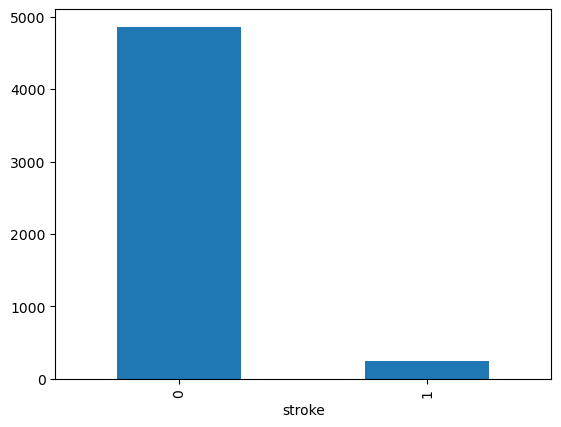

In [ ]:
y.value_counts().plot.bar() # before

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

In [ ]:
X_b,y_b=sm.fit_resample(X,y)

<Axes: xlabel='stroke'>

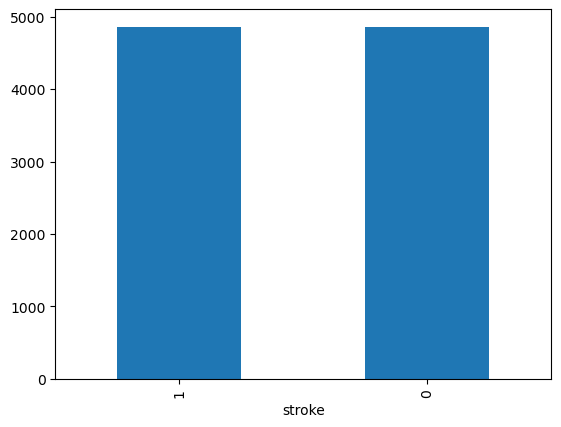

In [ ]:
y_b.value_counts().plot.bar() # after

In [ ]:
X_b=pd.DataFrame(X_b)
y_b=pd.DataFrame(y_b)

# **Plots after balancing:**